# Isabelle Geller: Assignment 3

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Step 1:
- load data from using pandas
- convert x and y to numpy array
    - each row of x contains an ECG signal in a single heartbeat ONLY SIGNAL POINTS NOT TIME
    - the class label of a signal is in the corresponding row of y ( Y[0] is the class of label of X[0]
- get time points
- improve classification and reshape Y so the class label is stored in a 1D array so we can use sk-learn for classification

In [25]:
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')


X.interpolate(method='linear', axis=1, inplace=True)
X = X.values
# X.isnull().sum().sum()

# Y.interpolate(method='linear', limit_area='inside', axis=1, inplace=True)
Y = Y['class_label'].values
# Y.isnull().sum().sum()

fs=125 # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints

# Y.reshape(187, 800)
# print(Y)

### Step 2: visualize the data
- show 3 signals per class using random color
- figure with 5 regions: plt.subplot(5, 1)
- constrained layout = true
- adjust figsize in subplots

Text(0, 0.5, 'Signal Amplitude')

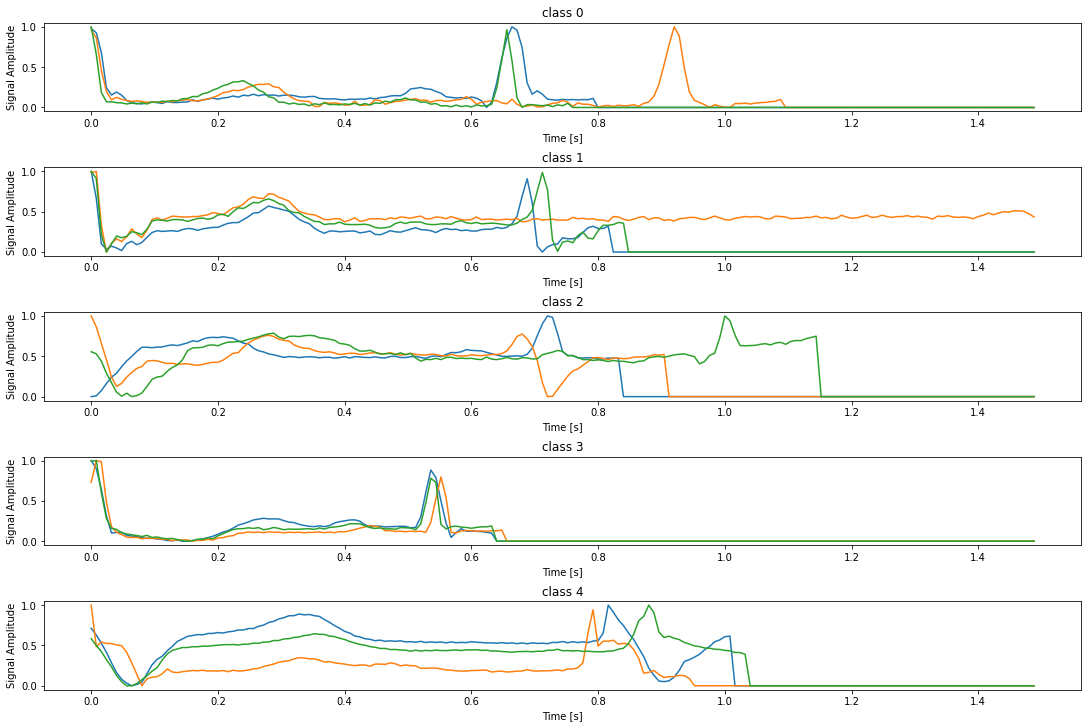

In [26]:
fig, ax = plt.subplots(5, 1, constrained_layout=True)
fig.set_figheight(10)
fig.set_figwidth(15)

ax[0].plot(t, X[Y==0][0], linestyle='-')
ax[0].plot(t, X[Y==0][1], linestyle='-')
ax[0].plot(t, X[Y==0][2], linestyle='-')
ax[0].set_title('class 0')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')

ax[1].plot(t, X[Y==1][0], linestyle='-')
ax[1].plot(t, X[Y==1][1], linestyle='-')
ax[1].plot(t, X[Y==1][2], linestyle='-')
ax[1].set_title('class 1')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')

ax[2].plot(t, X[Y==2][0], linestyle='-')
ax[2].plot(t, X[Y==2][1], linestyle='-')
ax[2].plot(t, X[Y==2][2], linestyle='-')
ax[2].set_title('class 2')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Signal Amplitude')

ax[3].plot(t, X[Y==3][0], linestyle='-')
ax[3].plot(t, X[Y==3][1], linestyle='-')
ax[3].plot(t, X[Y==3][2], linestyle='-')
ax[3].set_title('class 3')
ax[3].set_xlabel('Time [s]')
ax[3].set_ylabel('Signal Amplitude')


ax[4].plot(t, X[Y==4][0], linestyle='-')
ax[4].plot(t, X[Y==4][1], linestyle='-')
ax[4].plot(t, X[Y==4][2], linestyle='-')
ax[4].set_title('class 4')
ax[4].set_xlabel('Time [s]')
ax[4].set_ylabel('Signal Amplitude')

### Step 3: train-test split to get training and test datasets
- 80% for training and 20% fortesting
- set random_state=0 in train_test_split so that the result is reproducible

In [27]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

### Step 4: build a KNN classifier to predict class label ofa signal
- define a KNN model and set N_neighbors=10
- train the model on the training set
- make predictions on the training and test sets
    - Y_train_pred = model.predict(X_train)
    - Y_test_pred = model.predict(X_test)
- print classification accuracy on the training set (aka print training accuracy)
- print classification accuracy on the test set (aka print testing accuracy)
- show the confusion matrix on the test using a heat map

Training Accuracy: 0.841796875
Testing Accuracy 0.8543563068920677


<AxesSubplot:>

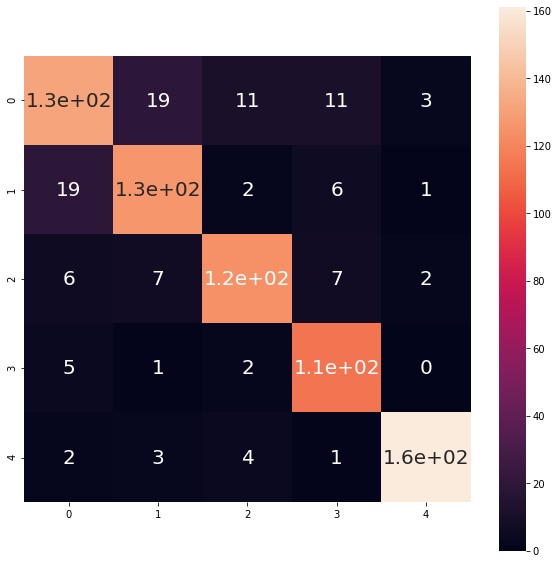

In [28]:
# define knn model
knn = KNeighborsClassifier(n_neighbors = 10)

#train the model on training data
knn.fit(X_train, Y_train)

#make predictions
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

#print classification accuracies for test and training
print('Training Accuracy:', accuracy_score(Y_train, Y_train_pred))
print('Testing Accuracy', accuracy_score(Y_test, Y_test_pred))


#show the confusion matrix on the test set using heatmap
cm = confusion_matrix(Y_test, Y_test_pred)
df_cm = pd.DataFrame(cm, index = ['0', '1', '2', '3', '4'],
                     columns = ['0', '1', '2', '3', '4'])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20},  square=True)

### BONUS NOT COMPLETE:  find the optimal value of the hyper parameter: n_neighbors
- split training set into a 'pure' training set (80%) and a validation set (20%), and then apply GridSearchCV
-  The optimal value may be 1. Then build and evaluate a model with the optimal parameter.

#we only need the indexes and do not need the actual splitting
idx_list=np.arange(0, Y_train)
rng=np.random.RandomState(0)
rng.shuffle(idx_list)
train_idx=idx_list[0:3072]
val_idx=idx_list[3072:]

from sklearn.neighbors import KNeighborsClassifier
# create a list of possible values of the parameter n_neighbors
n_list=np.arange(1, 100, 5)

#create a dictionary of model hyper-parameter(s)
#in this example, the model has only one hyper-parameter: n_neighbors
#in general, a model can have more than one hyper-parameter
param_grid = {'n_neighbors':n_list}


from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
#here, we only do train-validation once by using (train_idx, val_idx)
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=[(train_idx, val_idx)])
#set cv=5 to do 5-fold cross-validation


gs.fit(X_train, Y_train)

gs.cv_results_


# accuracy on validation set
acc_val_list=gs.cv_results_['mean_classification']
acc_val_list

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(n_list, acc_val_list)
ax.set_title('val accuracy vs n')
ax.set_xlabel('n')
ax.set_ylabel('accuracy')